# Market Basket analysis

In [1]:
# Librerías
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('DataCentro/Cuadro_Completo_Estadistica.xlsx')
df

,Fecha,Hora,Tipo_de_Orden,Id_Empleado,id_compra,id_producto,Nombre_Producto,Valor_Producto,Nombre_Categoría,Cantidad,Costo,Precio,ISV,Total_Linea,Total_Factura,Efectivo,Total_Tarjeta
0,01-10-2023,08:33,Restaurante,9,30010100567142,186,04-FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,137.0000,500.0,0.0
1,01-10-2023,08:33,Restaurante,9,30010100567142,36,25-ENSALADA,0.000,Extras,1,2.96,20.0000,3.0000,23.0000,137.0000,500.0,0.0
2,01-10-2023,08:39,Restaurante,9,30010100567143,54,37-TE FRIO,0.000,Bebidas,1,12.00,22.6087,3.3913,26.0000,26.0000,106.0,0.0
3,01-10-2023,08:41,Restaurante,9,30010100567144,26,09-FRITO PECHUGA,0.125,Asado y Frito,1,21.81,36.5217,5.4783,42.0000,42.0000,42.0,0.0
4,01-10-2023,08:48,Restaurante,9,30010100567145,51,28-PEPSI 600 ML,0.000,Bebidas,1,12.50,17.3913,2.6087,20.0000,88.0000,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,31-12-2023,19:37,Restaurante,2,30010100583652,186,04-FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,114.0000,114.0,0.0
33829,31-12-2023,19:45,Restaurante,2,30010100583653,186,04-FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,114.0000,500.0,0.0
33830,31-12-2023,19:47,Restaurante,2,30010100583654,9,01-FRITO 8 PIEZAS,1.000,Combos Familiares,1,111.06,191.3043,28.6956,219.9999,219.9999,500.0,0.0
33831,31-12-2023,19:50,Restaurante,2,30010100583655,9,01-FRITO 8 PIEZAS,1.000,Combos Familiares,1,111.06,191.3043,28.6956,219.9999,255.0000,255.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33833 entries, 0 to 33832
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             33833 non-null  object 
 1   Hora              33833 non-null  object 
 2   Tipo_de_Orden     33833 non-null  object 
 3   Id_Empleado       33833 non-null  int64  
 4   id_compra         33833 non-null  int64  
 5   id_producto       33833 non-null  int64  
 6   Nombre_Producto   33833 non-null  object 
 7   Valor_Producto    33833 non-null  float64
 8   Nombre_Categoría  33833 non-null  object 
 9   Cantidad          33833 non-null  int64  
 10  Costo             33833 non-null  float64
 11  Precio            33833 non-null  float64
 12  ISV               33833 non-null  float64
 13  Total_Linea       33833 non-null  float64
 14  Total_Factura     33833 non-null  float64
 15  Efectivo          33833 non-null  float64
 16  Total_Tarjeta     33833 non-null  float6

## Exploration of transactions and items

In [4]:
df['Nombre_Producto'].unique()

array(['04-FRITO MEDIO POLLO', '25-ENSALADA', '37-TE FRIO',
       '09-FRITO PECHUGA', '28-PEPSI 600 ML', '31-PEPSI LATA',
       '13-FRITO  ALA', '35-TORTILLAS PAQUETE (5)',
       '24-PAPAS (EN BOLSITA)', '01-FRITO 8 PIEZAS',
       '44-NECTAR PETIT SURTIDO CAJA', '36-AGUA PURA',
       '15-ASADO POLLO ENTERO', '10-FRITO PIERNA', '11-FRITO MUSLO',
       '33-PEPSI 1.5L', '23-TORTILLAS', '39-GATORADE SURTIDO',
       '18-ASADO MEDIO POLLO', 'Infantil 1 pieza+ papa + petit nectar',
       '06-FRITO 2 PIEZAS(MUSLO + PIERNA) + 1EXTRAS',
       '53-PROMOCION#6 (3 piezas + extra + lata)',
       'Frito 2 Piezas(Ala+pierna) +1 extra',
       'Pechuga Ala + 1 Extra Pedidos Ya', 'Refresco Lata Pedidos Ya',
       '6 Piezas + 3 Extras Pedidos Ya', 'Asado Pierna Muslo Pedidos YA',
       'Papas en Bolsa Pedidos Ya',
       '07-FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS',
       '21-ASADO ALA-PECHUGA', 'Muslo Pedidos Ya',
       'Asado Pechuga Ala Pedidos Ya', '05-FRITO 6 PIEZAS + 3 EXTRAS',
     

In [5]:
# Eliminate initial numbering and hyphen at the beginning of 'Nombre_Producto', preserving the internal numbers
df['Nombre_Producto'] = df['Nombre_Producto'].str.replace(r'^\d+-', '', regex=True)

# Show relevant columns
df

,Fecha,Hora,Tipo_de_Orden,Id_Empleado,id_compra,id_producto,Nombre_Producto,Valor_Producto,Nombre_Categoría,Cantidad,Costo,Precio,ISV,Total_Linea,Total_Factura,Efectivo,Total_Tarjeta
0,01-10-2023,08:33,Restaurante,9,30010100567142,186,FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,137.0000,500.0,0.0
1,01-10-2023,08:33,Restaurante,9,30010100567142,36,ENSALADA,0.000,Extras,1,2.96,20.0000,3.0000,23.0000,137.0000,500.0,0.0
2,01-10-2023,08:39,Restaurante,9,30010100567143,54,TE FRIO,0.000,Bebidas,1,12.00,22.6087,3.3913,26.0000,26.0000,106.0,0.0
3,01-10-2023,08:41,Restaurante,9,30010100567144,26,FRITO PECHUGA,0.125,Asado y Frito,1,21.81,36.5217,5.4783,42.0000,42.0000,42.0,0.0
4,01-10-2023,08:48,Restaurante,9,30010100567145,51,PEPSI 600 ML,0.000,Bebidas,1,12.50,17.3913,2.6087,20.0000,88.0000,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,31-12-2023,19:37,Restaurante,2,30010100583652,186,FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,114.0000,114.0,0.0
33829,31-12-2023,19:45,Restaurante,2,30010100583653,186,FRITO MEDIO POLLO,0.500,Asado y Frito,1,0.00,99.1304,14.8696,114.0000,114.0000,500.0,0.0
33830,31-12-2023,19:47,Restaurante,2,30010100583654,9,FRITO 8 PIEZAS,1.000,Combos Familiares,1,111.06,191.3043,28.6956,219.9999,219.9999,500.0,0.0
33831,31-12-2023,19:50,Restaurante,2,30010100583655,9,FRITO 8 PIEZAS,1.000,Combos Familiares,1,111.06,191.3043,28.6956,219.9999,255.0000,255.0,0.0


In [6]:
# Invoice items 30010100567142
# ==============================================================================
df.query("id_compra == 30010100567142")

,Fecha,Hora,Tipo_de_Orden,Id_Empleado,id_compra,id_producto,Nombre_Producto,Valor_Producto,Nombre_Categoría,Cantidad,Costo,Precio,ISV,Total_Linea,Total_Factura,Efectivo,Total_Tarjeta
0,01-10-2023,08:33,Restaurante,9,30010100567142,186,FRITO MEDIO POLLO,0.5,Asado y Frito,1,0.00,99.1304,14.8696,114.0,137.0,500.0,0.0
1,01-10-2023,08:33,Restaurante,9,30010100567142,36,ENSALADA,0.0,Extras,1,2.96,20.0000,3.0000,23.0,137.0,500.0,0.0


In [7]:
print(f"Total number of transactions: {df['id_compra'].nunique()}")
print(f"Total number of items: {df['Nombre_Producto'].nunique()}")

Total number of transactions: 16503
Total number of items: 71


In [8]:
# Items grouped by transaction
# ==============================================================================
df.groupby('id_compra')['Nombre_Producto'].apply(list)

id_compra
30010100567142                        [FRITO MEDIO POLLO, ENSALADA]
30010100567143                                            [TE FRIO]
30010100567144                                      [FRITO PECHUGA]
30010100567145    [PEPSI 600 ML, PEPSI LATA, FRITO  ALA, TORTILL...
30010100567146                                 [PAPAS (EN BOLSITA)]
                                        ...                        
30010100583651                                  [FRITO MEDIO POLLO]
30010100583652                                  [FRITO MEDIO POLLO]
30010100583653                                  [FRITO MEDIO POLLO]
30010100583654                                     [FRITO 8 PIEZAS]
30010100583655                   [FRITO 8 PIEZAS, GATORADE SURTIDO]
Name: Nombre_Producto, Length: 16503, dtype: object

count    16503.000000
mean         2.050112
std          1.347589
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          4.000000
max         39.000000
Name: Nombre_Producto, dtype: float64

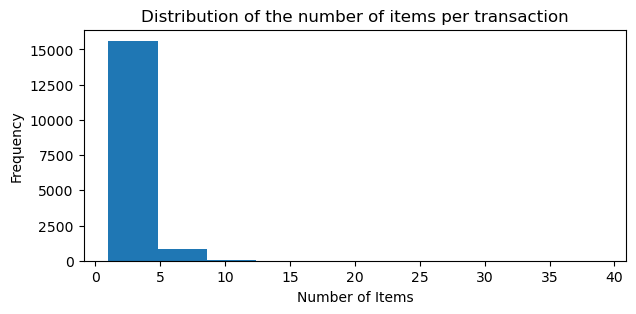

In [9]:
# Distribution of the number of items per transaction
# ==============================================================================
display(df.groupby('id_compra')['Nombre_Producto'].size().describe(percentiles=[.25, .5, .75, .9]))

fig, ax = plt.subplots(figsize=(7, 3))
df.groupby('id_compra')['Nombre_Producto'].size().plot.hist(ax=ax)
ax.set_title('Distribution of the number of items per transaction');
ax.set_xlabel('Number of Items');

In [10]:
# Encode transactions as a binary matrix
# ==============================================================================
# Create a list of lists containing the items for each transaction
transacciones = df.groupby('id_compra')['Nombre_Producto'].apply(list).to_list()

# Entrenar el objeto TransactionEncoder y transformar los datos
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
transacciones_encoded = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)
transacciones_encoded.head(3)

,PROMOCION#4 (8 piezas + Orden Tacos),6 Piezas + 3 Extras Pedidos Ya,7UP 1.5L,7UP 600 ML,7UP LATA,8 Piezas + 4 Extras Pedidos Ya,AGUA PURA,ASADO ALA-PECHUGA,ASADO MEDIO POLLO,ASADO PIERNA-MUSLO,...,Pechuga Pedidos Ya,Pierna PedidosYa,Pollo Frito Entero Pedidos Ya,Refresco 1.5 L Pedidos YA,Refresco Lata Pedidos Ya,TACOS DE POLLO,TE FRIO,TORTILLAS,TORTILLAS PAQUETE (5),Tacos(2) 1 extra
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Percentage of transactions in which each product appears (top 5)
# ==============================================================================
transacciones_encoded.mean(axis = 0).sort_values(ascending = False).head(5)

FRITO MEDIO POLLO        0.254863
TORTILLAS PAQUETE (5)    0.240926
PAPAS (EN BOLSITA)       0.230201
FRITO PECHUGA            0.172817
FRITO 8 PIEZAS           0.156941
dtype: float64

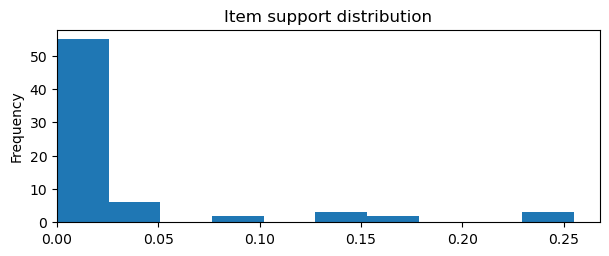

In [12]:
# Item support distribution
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
transacciones_encoded.mean(axis = 0).plot.hist(ax = ax)
ax.set_xlim(0, )
ax.set_title('Item support distribution');

## Itemsets

In [13]:
# Encode transactions as a binary matrix
# ==============================================================================
# Crear una lista de listas que contenga los artículos comprados en cada transacción
transacciones = df.groupby('id_compra')['Nombre_Producto'].apply(list).to_list()

# Train the TransactionEncoder and transform the data
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
transacciones_encoded = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)
transacciones_encoded.head(3)

,PROMOCION#4 (8 piezas + Orden Tacos),6 Piezas + 3 Extras Pedidos Ya,7UP 1.5L,7UP 600 ML,7UP LATA,8 Piezas + 4 Extras Pedidos Ya,AGUA PURA,ASADO ALA-PECHUGA,ASADO MEDIO POLLO,ASADO PIERNA-MUSLO,...,Pechuga Pedidos Ya,Pierna PedidosYa,Pollo Frito Entero Pedidos Ya,Refresco 1.5 L Pedidos YA,Refresco Lata Pedidos Ya,TACOS DE POLLO,TE FRIO,TORTILLAS,TORTILLAS PAQUETE (5),Tacos(2) 1 extra
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Identification of frequent itemsets
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
print(f"Soporte mínimo: {soporte}")

itemsets = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)
itemsets.sort_values(by='support', ascending=False)

Soporte mínimo: 0.0018178512997636793


,support,itemsets
12,0.254863,(FRITO MEDIO POLLO)
32,0.240926,(TORTILLAS PAQUETE (5))
21,0.230201,(PAPAS (EN BOLSITA))
14,0.172817,(FRITO PECHUGA)
11,0.156941,(FRITO 8 PIEZAS)
...,...,...
326,0.001818,"(FRITO PIERNA, TORTILLAS PAQUETE (5), ENSALADA..."
184,0.001818,"(PEPSI 600 ML, FRITO ALA, ENSALADA)"
330,0.001818,"(FRITO PIERNA, PEPSI 600 ML, TORTILLAS PAQUETE..."
177,0.001818,"(ASADO MEDIO POLLO, ENSALADA, PAPAS (EN BOLSITA))"


## Top 10 Itemsets

In [15]:
# Top 10 itemsets with greatest support
# ==============================================================================
itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
12,0.254863,(FRITO MEDIO POLLO)
32,0.240926,(TORTILLAS PAQUETE (5))
21,0.230201,(PAPAS (EN BOLSITA))
14,0.172817,(FRITO PECHUGA)
11,0.156941,(FRITO 8 PIEZAS)
8,0.143368,(FRITO ALA)
13,0.138823,(FRITO MUSLO)
15,0.135369,(FRITO PIERNA)
23,0.099679,(PEPSI 600 ML)
7,0.081682,(ENSALADA)


## Filtering Itemsets

In [16]:
# Top 10 itemsets with at least 2 items, sorted by support
# ==============================================================================
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 2').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
154,0.075623,"(TORTILLAS PAQUETE (5), PAPAS (EN BOLSITA))",2
83,0.065685,"(FRITO ALA, FRITO PECHUGA)",2
120,0.061201,"(FRITO PIERNA, FRITO MUSLO)",2
136,0.057747,"(TORTILLAS PAQUETE (5), FRITO PECHUGA)",2
127,0.049991,"(FRITO MUSLO, TORTILLAS PAQUETE (5))",2
129,0.048900,"(FRITO PECHUGA, PAPAS (EN BOLSITA))",2
92,0.048597,"(TORTILLAS PAQUETE (5), FRITO ALA)",2
112,0.047204,"(FRITO MEDIO POLLO, PAPAS (EN BOLSITA))",2
143,0.045204,"(FRITO PIERNA, TORTILLAS PAQUETE (5))",2
85,0.043871,"(FRITO ALA, PAPAS (EN BOLSITA))",2


In [17]:
# Frequent itemsets containing the item FRITO MEDIO POLLO
# ==============================================================================
mask = itemsets['itemsets'].map(lambda x: 'FRITO MEDIO POLLO' in x)
itemsets.loc[mask].sort_values(by='support', ascending=False)

,support,itemsets,n_items
12,0.254863,(FRITO MEDIO POLLO),1
112,0.047204,"(FRITO MEDIO POLLO, PAPAS (EN BOLSITA))",2
118,0.032176,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5))",2
68,0.022541,"(FRITO MEDIO POLLO, ENSALADA)",2
98,0.013876,"(FRITO MEDIO POLLO, FRITO 8 PIEZAS)",2
114,0.011695,"(FRITO MEDIO POLLO, PEPSI 600 ML)",2
110,0.011634,"(FRITO MEDIO POLLO, FRITO PECHUGA)",2
261,0.011634,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), PAP...",3
188,0.010241,"(FRITO MEDIO POLLO, ENSALADA, PAPAS (EN BOLSITA))",3
111,0.010059,"(FRITO PIERNA, FRITO MEDIO POLLO)",2


In [18]:
# Frequent itemsets containing the items at least FRITO MEDIO POLLO and TORTILLAS PAQUETE (5)
# ==============================================================================
items = {'FRITO MEDIO POLLO', 'TORTILLAS PAQUETE (5)'}
mask = itemsets['itemsets'].map(lambda x: x.issuperset(items))
itemsets.loc[mask].sort_values(by='support', ascending=False).reset_index()

,index,support,itemsets,n_items
0,118,0.032176,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5))",2
1,261,0.011634,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), PAP...",3
2,263,0.006544,"(FRITO MEDIO POLLO, PEPSI 1.5L, TORTILLAS PAQU...",3
3,264,0.005878,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), PEP...",3
4,190,0.005817,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), ENS...",3
5,267,0.004726,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), TOR...",3
6,356,0.004302,"(FRITO MEDIO POLLO, PEPSI 1.5L, TORTILLAS PAQU...",4
7,319,0.003393,"(FRITO MEDIO POLLO, TORTILLAS PAQUETE (5), ENS...",4
8,353,0.002909,"(FRITO MEDIO POLLO, PEPSI 1.5L, TORTILLAS PAQU...",4
9,355,0.002363,"(TORTILLAS, FRITO MEDIO POLLO, TORTILLAS PAQUE...",4


In [19]:
# Identification subsets
# ==============================================================================
itemset_a = {'FRITO MEDIO POLLO', 'TORTILLAS PAQUETE (5)', 'PAPAS (EN BOLSITA)'}
itemset_b = {'FRITO MEDIO POLLO', 'TORTILLAS PAQUETE (5)', 'ENSALADA'}

print(itemset_a.issubset(itemset_b))
print(itemset_b.issuperset(itemset_a))

False
False


## Association rules

In [20]:
# Identification of frequent itemsets
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
itemsets_frecuentes = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)

# Create association rules (minimum 70% confidence for a rule to be selected)
# ==============================================================================
confidence = 0.7 
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=confidence)

print(f"Number of rules generated: {len(reglas)}")
print(f"Minimum confidence: {reglas['confidence'].min()}")
print(f"Maximum confidence: {reglas['confidence'].max()}")
reglas.sort_values(by='confidence').head(5)

Number of rules generated: 53
Minimum confidence: 0.7024793388429752
Maximum confidence: 1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,"(PEPSI MINI 355 ML, FRITO PIERNA)",(TORTILLAS PAQUETE (5)),0.007332,0.240926,0.005151,0.702479,2.915749,0.003384,2.551332,0.661888
45,"(FRITO MUSLO, PAPAS (EN BOLSITA), PEPSI LATA)",(TORTILLAS PAQUETE (5)),0.003272,0.240926,0.002303,0.703704,2.920831,0.001514,2.561875,0.659791
26,"(PEPSI 1.5L, ENSALADA, TORTILLAS)",(PAPAS (EN BOLSITA)),0.002666,0.230201,0.001878,0.704545,3.060572,0.001265,2.605475,0.675064
20,"(FRITO PIERNA, PEPSI 600 ML)",(TORTILLAS PAQUETE (5)),0.013210,0.240926,0.009392,0.711009,2.951153,0.006210,2.626637,0.670000
33,"(PEPSI 1.5L, FRITO 8 PIEZAS, TORTILLAS)",(TORTILLAS PAQUETE (5)),0.002727,0.240926,0.001939,0.711111,2.951576,0.001282,2.627564,0.663006


## Filtering Rules

In [21]:
# Select rules that have "TORTILLAS PAQUETE (5)" in the consequent
# ==============================================================================
mask = reglas['consequents'].map(lambda x: 'TORTILLAS PAQUETE (5)' in x)
reglas.loc[mask].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(PEPSI MINI 355 ML, ENSALADA)",(TORTILLAS PAQUETE (5)),0.003878,0.240926,0.002787,0.718750,2.983283,0.001853,2.698930,0.667387
4,"(ENSALADA, TORTILLAS)",(TORTILLAS PAQUETE (5)),0.003515,0.240926,0.002666,0.758621,3.148772,0.001819,3.144736,0.684823
6,"(PEPSI MINI 355 ML, FRITO ALA)",(TORTILLAS PAQUETE (5)),0.006847,0.240926,0.005029,0.734513,3.048710,0.003380,2.859179,0.676625
12,"(FRITO MEDIO POLLO, PEPSI 1.5L)",(TORTILLAS PAQUETE (5)),0.008726,0.240926,0.006544,0.750000,3.112990,0.004442,3.036296,0.684740
13,"(FRITO MEDIO POLLO, TORTILLAS)",(TORTILLAS PAQUETE (5)),0.005938,0.240926,0.004726,0.795918,3.303582,0.003296,3.719463,0.701464
14,"(PEPSI 600 ML, FRITO MUSLO)",(TORTILLAS PAQUETE (5)),0.013816,0.240926,0.009998,0.723684,3.003763,0.006670,2.747125,0.676430
15,"(FRITO MUSLO, PEPSI LATA)",(TORTILLAS PAQUETE (5)),0.007271,0.240926,0.005332,0.733333,3.043813,0.003580,2.846528,0.676383
16,"(PEPSI MINI 355 ML, FRITO MUSLO)",(TORTILLAS PAQUETE (5)),0.008726,0.240926,0.006484,0.743056,3.084166,0.004381,2.954234,0.681712
17,"(PEPSI 1.5L, FRITO PECHUGA)",(TORTILLAS PAQUETE (5)),0.003515,0.240926,0.002545,0.724138,3.005646,0.001698,2.751644,0.669646
18,"(PEPSI LATA, FRITO PECHUGA)",(TORTILLAS PAQUETE (5)),0.008120,0.240926,0.005878,0.723881,3.004578,0.003921,2.749079,0.672636


In [22]:
# Background of the rules that have "TORTILLAS PAQUETE (5)" in the consequent
# ==============================================================================
antecedents = reglas.loc[mask, 'antecedents'].to_list()
set().union(*antecedents)

{'ENSALADA',
 'FRITO  ALA',
 'FRITO 8 PIEZAS',
 'FRITO MEDIO POLLO',
 'FRITO MUSLO',
 'FRITO PECHUGA',
 'FRITO PIERNA',
 'PAPAS (EN BOLSITA)',
 'PEPSI 1.5L',
 'PEPSI 600 ML',
 'PEPSI LATA',
 'PEPSI MINI 355 ML',
 'TORTILLAS'}

In [23]:
# Create a column with the items that are part of the antecedent and the consequent
# ======================================================================================
reglas['items'] = reglas[['antecedents', 'consequents']].apply(lambda x: set().union(*x), axis=1)
reglas.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,items
0,(FRITO 2 PIEZAS(MUSLO + PIERNA) + 1EXTRAS),(PAPAS (EN BOLSITA)),0.007938,0.230201,0.007938,1.000000,4.344038,0.006111,inf,0.775959,"{FRITO 2 PIEZAS(MUSLO + PIERNA) + 1EXTRAS, PAP..."
1,(FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS),(PAPAS (EN BOLSITA)),0.008120,0.230201,0.008059,0.992537,4.311620,0.006190,103.153124,0.774356,"{FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS, PAP..."
2,"(ENSALADA, TORTILLAS)",(PEPSI 1.5L),0.003515,0.031328,0.002666,0.758621,24.215701,0.002556,4.013071,0.962086,"{PEPSI 1.5L, ENSALADA, TORTILLAS}"
3,"(PEPSI MINI 355 ML, ENSALADA)",(TORTILLAS PAQUETE (5)),0.003878,0.240926,0.002787,0.718750,2.983283,0.001853,2.698930,0.667387,"{PEPSI MINI 355 ML, TORTILLAS PAQUETE (5), ENS..."
4,"(ENSALADA, TORTILLAS)",(TORTILLAS PAQUETE (5)),0.003515,0.240926,0.002666,0.758621,3.148772,0.001819,3.144736,0.684823,"{TORTILLAS PAQUETE (5), ENSALADA, TORTILLAS}"
5,"(FRITO ALA, TORTILLAS)",(PAPAS (EN BOLSITA)),0.004423,0.230201,0.003272,0.739726,3.213398,0.002254,2.957650,0.691863,"{PAPAS (EN BOLSITA), FRITO ALA, TORTILLAS}"
6,"(PEPSI MINI 355 ML, FRITO ALA)",(TORTILLAS PAQUETE (5)),0.006847,0.240926,0.005029,0.734513,3.048710,0.003380,2.859179,0.676625,"{PEPSI MINI 355 ML, TORTILLAS PAQUETE (5), FRI..."
7,"(TORTILLAS PAQUETE (5), FRITO 2 PIEZAS(MUSLO +...",(PAPAS (EN BOLSITA)),0.003817,0.230201,0.003817,1.000000,4.344038,0.002939,inf,0.772749,"{TORTILLAS PAQUETE (5), FRITO 2 PIEZAS(MUSLO +..."
8,"(PEPSI 600 ML, FRITO 2 PIEZAS(PECHUGA +ALA ) +...",(PAPAS (EN BOLSITA)),0.001878,0.230201,0.001878,1.000000,4.344038,0.001446,inf,0.771248,"{PEPSI 600 ML, FRITO 2 PIEZAS(PECHUGA +ALA ) +..."
9,"(TORTILLAS PAQUETE (5), FRITO 2 PIEZAS(PECHUGA...",(PAPAS (EN BOLSITA)),0.003575,0.230201,0.003575,1.000000,4.344038,0.002752,inf,0.772561,"{TORTILLAS PAQUETE (5), FRITO 2 PIEZAS(PECHUGA..."


## Product by Product Association Rules

In [24]:
# Identification of frequent itemsets (2 items)
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
itemsets_frecuentes = apriori(
                          transacciones_encoded, 
                          min_support  = soporte, 
                          use_colnames = True, 
                          max_len      = 2
                      )

In [25]:
# Calculate base lift
# ==============================================================================
lift = 0
reglas = association_rules(itemsets_frecuentes, metric="lift", min_threshold=lift)

print(f"Number of rules generated: {len(reglas)}")
print(f"Mean Lift: {reglas['lift'].mean()}")
print(f"Median Lift: {reglas['lift'].median()}")

Number of rules generated: 264
Mean Lift: 1.3034000351045627
Median Lift: 1.1511427623746133


In [26]:
# Create association rules (minimum lift of 1.6)
# ==============================================================================
lift = 1.6
reglas = association_rules(itemsets_frecuentes, metric="lift", min_threshold=lift)

print(f"Number of rules generated: {len(reglas)}")
print(f"Minimum Lift: {reglas['lift'].min()}")
print(f"Maximum Lift: {reglas['lift'].max()}")
reglas.sort_values(by='lift').head(10)

Number of rules generated: 54
Minimum Lift: 1.6230471292329673
Maximum Lift: 19.135705388518133


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ASADO PIERNA-MUSLO),(PAPAS (EN BOLSITA)),0.011028,0.230201,0.004120,0.373626,1.623047,0.001582,1.228978,0.388156
5,(PAPAS (EN BOLSITA)),(ASADO PIERNA-MUSLO),0.230201,0.011028,0.004120,0.017899,1.623047,0.001582,1.006996,0.498669
51,(TE FRIO),(TORTILLAS PAQUETE (5)),0.011634,0.240926,0.004605,0.395833,1.642967,0.001802,1.256399,0.395952
50,(TORTILLAS PAQUETE (5)),(TE FRIO),0.240926,0.011634,0.004605,0.019115,1.642967,0.001802,1.007626,0.515556
37,(PAPAS (EN BOLSITA)),(TE FRIO),0.230201,0.011634,0.004484,0.019479,1.674265,0.001806,1.008000,0.523153
36,(TE FRIO),(PAPAS (EN BOLSITA)),0.011634,0.230201,0.004484,0.385417,1.674265,0.001806,1.252555,0.407463
44,(PEPSI 600 ML),(TORTILLAS PAQUETE (5)),0.099679,0.240926,0.040659,0.407903,1.693063,0.016644,1.282009,0.454676
45,(TORTILLAS PAQUETE (5)),(PEPSI 600 ML),0.240926,0.099679,0.040659,0.168763,1.693063,0.016644,1.083110,0.539281
35,(TORTILLAS PAQUETE (5)),(NECTAR PETIT SURTIDO CAJA),0.240926,0.006362,0.002666,0.011066,1.739322,0.001133,1.004757,0.559976
34,(NECTAR PETIT SURTIDO CAJA),(TORTILLAS PAQUETE (5)),0.006362,0.240926,0.002666,0.419048,1.739322,0.001133,1.306603,0.427785


In [27]:
# Filter by minimum confidence of 50%
# ==============================================================================
confidence = 0.5
reglas = reglas[reglas['confidence'] >= confidence]

print(f"Number of rules generated: {len(reglas)}")
print(f"Minimum confidence: {reglas['confidence'].min()}")
print(f"Maximum confidence: {reglas['confidence'].max()}")
reglas.sort_values(by='confidence').head(10)

Number of rules generated: 6
Minimum confidence: 0.5210084033613446
Maximum confidence: 1.0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,(PEPSI MINI 355 ML),(TORTILLAS PAQUETE (5)),0.036054,0.240926,0.018784,0.521008,2.162526,0.010098,1.584734,0.557685
42,(PEPSI 1.5L),(TORTILLAS PAQUETE (5)),0.031328,0.240926,0.016664,0.531915,2.207795,0.009116,1.621658,0.564752
53,(TORTILLAS),(TORTILLAS PAQUETE (5)),0.023147,0.240926,0.012967,0.560209,2.325235,0.007391,1.725990,0.583441
41,(TORTILLAS),(PEPSI 1.5L),0.023147,0.031328,0.013876,0.599476,19.135705,0.013151,2.418515,0.970199
24,(FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS),(PAPAS (EN BOLSITA)),0.008120,0.230201,0.008059,0.992537,4.311620,0.006190,103.153124,0.774356
20,(FRITO 2 PIEZAS(MUSLO + PIERNA) + 1EXTRAS),(PAPAS (EN BOLSITA)),0.007938,0.230201,0.007938,1.000000,4.344038,0.006111,inf,0.775959


In [28]:
# 1 to 1 recommendations
# ==============================================================================
antecedente = 'FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS'

mask = reglas['antecedents'].map(lambda x: antecedente in x)
reglas.loc[mask]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(FRITO 2 PIEZAS(PECHUGA +ALA ) + 1 EXTRAS),(PAPAS (EN BOLSITA)),0.00812,0.230201,0.008059,0.992537,4.31162,0.00619,103.153124,0.774356
